<a href="https://colab.research.google.com/github/stevend3/ML/blob/master/ECE492_team66_projectC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project C1
## Team 66

In [2]:
# connect this notebook to google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


For the next line to work, go to Moodle, click the dataset link under `ProjC - Competition Project`. That will open up the data in Google Drive. Then, right click the folder name at the top of the screen and click `Add shortcut to Drive`. Navigate into `My Drive` and select the button in the bottom left of the pop-up window (it should be a folder with a plus sign in it). You will now be able to make a new folder. It must be titled `ECE492`. Finally, hit the `Add Shortcut` button. If this does not work, send me a slack message, and I can help debug.

In [3]:
cd '/content/drive/MyDrive/ECE492/ECE542_sp2022_Project_TerrainRecognition/'

/content/drive/.shortcut-targets-by-id/15qAg_VhIEGRIBGc6Uwr-dQssTLlpRNoO/ECE542_sp2022_Project_TerrainRecognition


In [4]:
!ls

ReadMe.txt  TestData  TrainingData  XVisualizeData.m


In [5]:
cd './TrainingData'

/content/drive/.shortcut-targets-by-id/15qAg_VhIEGRIBGc6Uwr-dQssTLlpRNoO/ECE542_sp2022_Project_TerrainRecognition/TrainingData


In [6]:
!ls

subject_001_01__x.csv	    subject_003_02__y.csv
subject_001_01__x_time.csv  subject_003_02__y_time.csv
subject_001_01__y.csv	    subject_003_03__x.csv
subject_001_01__y_time.csv  subject_003_03__x_time.csv
subject_001_02__x.csv	    subject_003_03__y.csv
subject_001_02__x_time.csv  subject_003_03__y_time.csv
subject_001_02__y.csv	    subject_004_01__x.csv
subject_001_02__y_time.csv  subject_004_01__x_time.csv
subject_001_03__x.csv	    subject_004_01__y.csv
subject_001_03__x_time.csv  subject_004_01__y_time.csv
subject_001_03__y.csv	    subject_004_02__x.csv
subject_001_03__y_time.csv  subject_004_02__x_time.csv
subject_001_04__x.csv	    subject_004_02__y.csv
subject_001_04__x_time.csv  subject_004_02__y_time.csv
subject_001_04__y.csv	    subject_005_01__x.csv
subject_001_04__y_time.csv  subject_005_01__x_time.csv
subject_001_05__x.csv	    subject_005_01__y.csv
subject_001_05__x_time.csv  subject_005_01__y_time.csv
subject_001_05__y.csv	    subject_005_02__x.csv
subject_001_05__y_time.cs

In [64]:
import pandas as pd
import numpy as np
import os

# create lists of file names for the data and labels
data_files = []
label_files = []
for file in os.listdir('./'):
  if file.endswith("y.csv"):
    label_files.append(file)
  elif file.endswith("x.csv"):
    data_files.append(file)

# sort the file names to keep all the data in chronological order
data_files.sort()
label_files.sort()

# make lists of the data from each csv
data_dfs = []
label_dfs = []
for i in range(len(data_files)):
  # load in the data and labels
  data_df = pd.read_csv(data_files[28], header=0, names=["accx", "accy", "accz", "gyrox", "gyroy", "gyroz"])
  label_df = pd.read_csv(label_files[28], header=0, names=["y"])

  # repeat every label 4 times to account for the difference in sampling rate
  label_df = label_df.loc[label_df.index.repeat(4)].reset_index(drop=True)

  # check the sizes of the dataframes
  len_diff = len(data_df) - len(label_df)
  # if lens are not same, repeat the last label until the lens are equal
  if len_diff != 0:
    label_vals = label_df.values.tolist()
    repeated_last_row = [label_df.iloc[-1]["y"] for i in range(len_diff)]
    label_vals.append(repeated_last_row)
    label_df = pd.DataFrame(label_vals, columns=["y"])  

  # append the dfs to the list of dfs
  data_dfs.append(data_df)
  label_dfs.append(label_df)

# turn the list of dfs into our data
df_data = pd.concat(data_dfs, ignore_index=True)
df_labels = pd.concat(label_dfs, ignore_index=True)

df_train = pd.concat([df_data, df_labels], axis=1)
df_train

,accx,accy,accz,gyrox,gyroy,gyroz,y
0,1.343451,9.393098,-2.520354,-0.000866,-0.001356,0.000000,0
1,1.322976,9.380536,-2.521071,0.000783,0.001976,0.001275,0
2,1.330000,9.386873,-2.500309,-0.003865,-0.001786,0.002706,0
3,1.346465,9.390606,-2.522929,-0.000782,-0.000864,0.003169,0
4,1.356462,9.392924,-2.542924,0.000565,0.003899,0.003879,0
...,...,...,...,...,...,...,...
1395968,2.072244,8.908878,-3.500000,0.001351,0.001191,0.001031,0
1395969,2.085123,8.915123,-3.520000,0.001918,-0.001147,0.000000,0
1395970,2.083774,8.910000,-3.538981,-0.002015,-0.004099,0.001042,0
1395971,2.111447,8.908553,-3.535724,0.000183,-0.001673,0.001856,0


Text(0.5, 1.0, 'Histogram of Frequency of Terrain Type in Training Data')

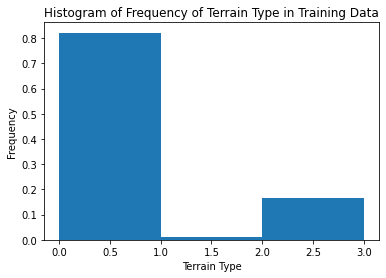

In [67]:
import matplotlib.pyplot as plt

plt.hist(df_train["y"], bins=3, density=True)
plt.xlabel("Terrain Type")
plt.ylabel("Frequency")
plt.title("Histogram of Frequency of Terrain Type in Training Data")